In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

output_folder = 'data/output/'
# output_folder = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder = 'run_1/mpi/data/output/'
# output_folder = 'run_2(mac)/data/output/'

# If fig folder exists remove it and its contents recursively
if os.path.exists(output_folder+"fig/"):
    shutil.rmtree(output_folder+"fig/")
os.mkdir(output_folder+"fig/")

fontsize = 22
labelsize = 18

In [2]:
# output_folder2 = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder2 = '/Users/nus/hg-core-decomposition/run_par/mpi/data/output/'
# df2 = pd.read_csv(output_folder2+"result.csv")
# df2.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df2 = df2.loc[df2['algo'].isin(['naive_nbr','improved_nbr'])]
# df2.shape
# df2.head()


In [2]:
# df = pd.read_csv("data/output/result.csv", header=None)
df = pd.read_csv(output_folder+"result.csv", header=None)
df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
print(df.shape)
# df.head()

(79, 18)


In [5]:
df = pd.concat([df,df2])
df.shape

NameError: name 'df2' is not defined

In [6]:
# # df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'param_s']
# print(df.shape)
# # df

### sample plotting

bin_1_bucket_update_time


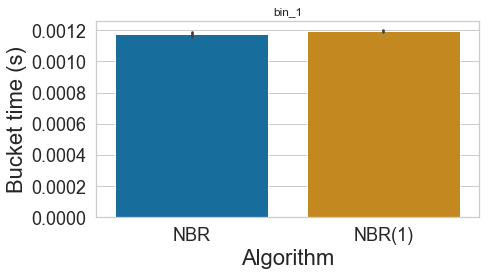

bin_1_execution_time


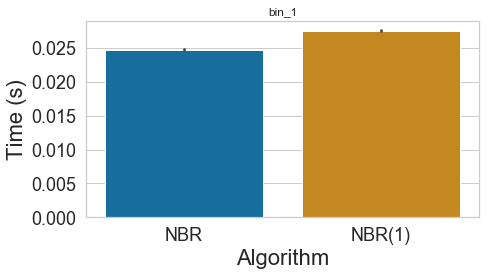

bin_1_init_time


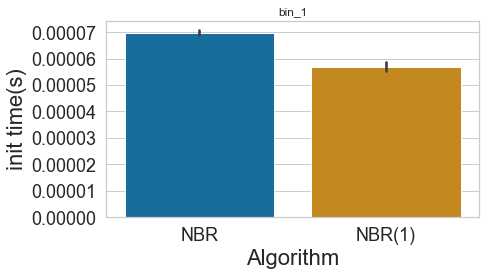

bin_1_inner_iteration


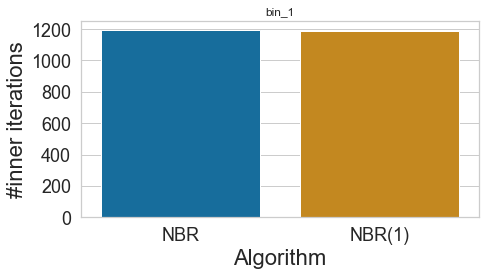

bin_1_neighborhood_call_time


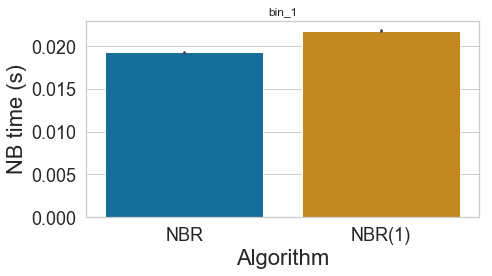

bin_1_num_bucket_update


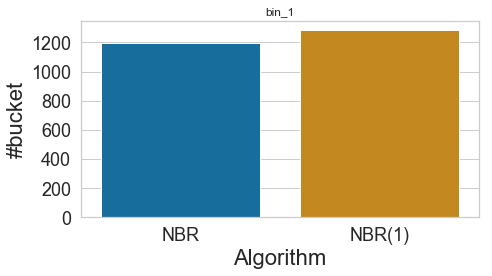

bin_1_num_neighborhood_computation


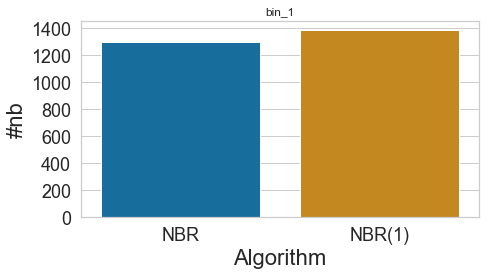

bin_1_num_subgraph_call


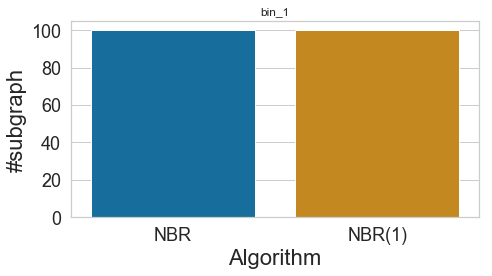

bin_1_outerloop_time


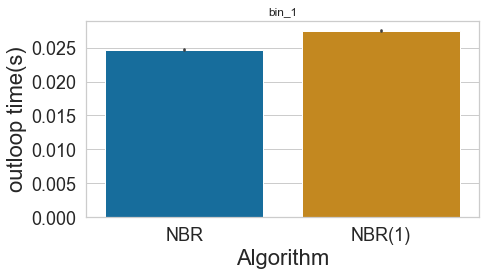

bin_1_subgraph_computation_time


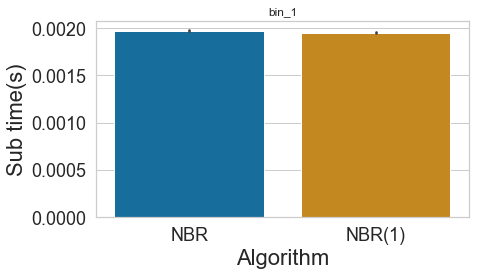

bin_1_total_iteration


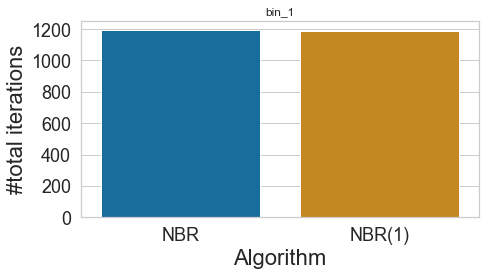

<Figure size 504x288 with 0 Axes>

In [3]:
save = False


sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    # 'num_threads' : '#Threads'
}

good_name_algo = {
    'naive_nbr' : "NBR", 
    'improved_nbr' : "NBR(1)", 
    'improved_nbr_simple':'NBR1s',
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    for y_axis in columns:

        sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)'])
        plt.xlabel('Algorithm', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        plt.title(key)
        plt.tight_layout()
        filename = (key + " " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

### Effect of parameter "s" in improved2_nbr

In [143]:
save = True

if(save):
    os.system("mkdir -p " + output_folder+"fig/param_s/" )

group_list = ['dataset']
for key, item in df[df['algo'] == 'improved2_nbr'].groupby(group_list, as_index=False):
    
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)

    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:

        sns.barplot(x='param_s', y=y_axis, data=item, palette='colorblind')
        plt.xlabel(r'$s$', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)

        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        filename = (key + " param_s " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/param_s/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break


<Figure size 504x288 with 0 Axes>

### Effect of threads for parallel algorithms

In [123]:
save = True
sns.set(rc={'figure.figsize':(7,4)})
if(save):
    os.system("mkdir -p " + output_folder+"fig/num_threads/" )


group_list = ['dataset','algo']
for key, item in df[df['algo'].isin(['par_improved2_nbr', 'par_improved3_nbr'])].groupby(group_list, as_index=False):
    # key contains dataset
    item['num_threads'] = item['num_threads'].astype(int)
    
    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:
        sns.barplot(x='num_threads', y=y_axis, data=item, palette='colorblind')
        plt.xlabel('#Threads', fontsize=fontsize)
        plt.ylabel(y_axis, fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # print(key)
        plt.title(key[0] + "_" + good_name_algo[key[1]])
        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        filename = (key[0] + "_" + good_name_algo[key[1]] + " num threads " + y_axis).replace(" ", "_")
        # filename = key+"_"+y_axis
        if(save):
            plt.savefig(output_folder+"fig/num_threads/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break


<Figure size 504x288 with 0 Axes>

### Effect of threads for parallel algorithms (multiple barplots)
--------------

In [150]:
save = True
sns.set(rc={'figure.figsize':(7,4)})
if(save):
    os.system("mkdir -p " + output_folder+"fig/num_threads/" )


group_list = ['dataset']
for key, item in df[df['algo'].isin(['par_improved2_nbr', 'par_improved3_nbr'])].groupby(group_list, as_index=False):
    # key contains dataset
    item['num_threads'] = item['num_threads'].astype(int)
    
    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:
        dat = item[['num_threads',y_axis,'algo']]
        dat = dat.melt(id_vars=['num_threads','algo'])
        # print(dat.head(10))
        # break
        sns.barplot(x='num_threads', y='value', hue='algo', data= dat, palette='colorblind')
        # sns.barplot(x='num_threads', y=y_axis, data=item, palette='colorblind')
        plt.xlabel('#Threads', fontsize=fontsize)
        plt.ylabel(y_axis, fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # print(key)
        # plt.title(key[0] + "_" + good_name_algo[key[1]])
        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        # filename = (key[0] + "_" + good_name_algo[key[1]] + " num threads " + y_axis).replace(" ", "_")
        filename = key+"_"+y_axis
        if(save):
            plt.savefig(output_folder+"fig/num_threads/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

<Figure size 504x288 with 0 Axes>

In [28]:
df.columns

Index(['algo', 'bucket update time', 'core', 'dataset', 'degree call time',
       'execution time', 'neighborhood call time', 'num bucket update',
       'num degree computation', 'num neighborhood computation', 'param_s'],
      dtype='object')

### statistics of run

In [30]:
group_list = ['dataset', 'algo', 'param_s']
for key, item in df.groupby(group_list, as_index=False):
    print(key, item.shape[0])

('default', 'improved2_nbr', 16.0) 100
('default', 'improved_nbr', 13.0) 100
('default', 'naive_degree', 13.0) 100
('default', 'naive_nbr', 1.0) 100


In [31]:
# df[(df['algo'] == "improved2_nbr") & (df['dataset'] == 'bin_4') & (df['param_s'] == 6)]

%Time spent on subgraph computation
-----------

In [72]:
save = True


sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", {'axes.grid' : True})



good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'ratio(subg.time,total)': "subgtime/total"
}

good_name_algo = {
    'naive_nbr' : "NBR", 
    'improved_nbr' : "NBR(1)", 
    'improved2_nbr' : "NBR(2)",
    'naive_degree' : "DEG"
}



df['ratio(subg.time,total)'] = df['subgraph computation time']/df['execution time']
group_list = ['dataset']
for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    # item['ratio(subg.time,total)'] = item['subgraph computation time']/item['execution time']
    # print(item[['execution time',  'subgraph computation time','ratio(subg.time,total)']].head())
    for y_axis in ['ratio(subg.time,total)']:

        sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)', 'NBR(2)'])
        plt.xlabel('Algorithm', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        plt.title(key)
        plt.tight_layout()
        filename = (key + " " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

<Figure size 360x216 with 0 Axes>

Distribution of core-numbers.
-----------

In [90]:
import ast

# save = True


sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", {'axes.grid' : True})



good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph"
}

good_name_algo = {
    'naive_nbr' : "NBR", 
    'improved_nbr' : "NBR(1)", 
    'improved2_nbr' : "NBR(2)",
    'naive_degree' : "DEG"
}




group_list = ['dataset']

for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    # item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    
    nbr_distr = {}
    core = ast.literal_eval(item[item['algo'] == 'NBR'].iloc[0].core)
    N = len(core)
    for node_id, core_num in core.items():
        nbr_distr[core_num] = nbr_distr.get(core_num,0) + 1/N 
    
    x = range(1,max(nbr_distr.keys())+1)
    y = [ nbr_distr.get(i,0) for i in x]
    plt.figure(figsize=(6,4))
    plt.plot(x,y, marker = 'o')
    plt.xlabel('nbr-core number')
    plt.ylabel('fraction of vertices')
    plt.title(key)
    plt.savefig(output_folder+"fig/"+'nbrcore_'+key+'.pdf',bbox_inches = 'tight')
    plt.close() 

    deg_distr = {}
    core = ast.literal_eval(item[item['algo'] == 'DEG'].iloc[0].core)
    N = len(core)
    for node_id, core_num in core.items():
        deg_distr[core_num] = deg_distr.get(core_num,0)+ 1/N 
    x = range(1,max(deg_distr.keys())+1)
    y = [ deg_distr.get(i,0) for i in x]
    plt.figure(figsize=(6,4))
    plt.plot(x,y,marker = 'o')
    plt.xlabel('deg-core number')
    plt.ylabel('fraction of vertices')
    plt.title(key)
    plt.savefig(output_folder+"fig/"+'degcore_'+key+'.pdf',bbox_inches = 'tight')
    plt.close()
    # for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'subgraph computation time', 'num subgraph call']:

    #     sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)', 'NBR(2)'])
    #     plt.xlabel('Algorithm', fontsize=fontsize)
    #     plt.ylabel(good_name[y_axis], fontsize=fontsize)
    #     # plt.yscale("log")
    #     plt.xticks(fontsize=labelsize)
    #     plt.yticks(fontsize=labelsize)
    #     plt.title(key)
    #     plt.tight_layout()
    #     filename = (key + " " + y_axis).replace(" ", "_")
    #     if(save):
    #         plt.savefig(output_folder+"fig/" + filename + ".pdf")
    #     else:
    #         print(filename)
    #         plt.show()
    #     plt.clf()

    # Commnet out following to see full results
    # if(not save):
    #     break

str

In [4]:
df.iloc[1].core

IndexError: single positional indexer is out-of-bounds

## Pandemic propagation results

In [50]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = 'data/output/'
if os.path.exists(output_folder+"fig/"):
    shutil.rmtree(output_folder+"fig/")
os.mkdir(output_folder+"fig/")

fontsize = 22
labelsize = 18

In [51]:
df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
df.columns = ['algo', 'dataset', 'p', 'result']
print(df.shape)
df

(10, 4)


,algo,dataset,p,result
0,naive_nbr,default,0.1,"{1: [0.07692307692307687, 0.07692307692307687,..."
1,naive_nbr,default,0.2,"{1: [0.07692307692307687, 0.07692307692307687,..."
2,naive_nbr,default,0.3,"{1: [0.07692307692307687, 0.07692307692307687,..."
3,naive_nbr,default,0.4,"{1: [0.07692307692307687, 0.07692307692307687,..."
4,naive_nbr,default,0.5,"{1: [0.07692307692307687, 0.07692307692307687,..."
5,naive_degree,default,0.1,"{1: [0.07692307692307687, 0.07692307692307687,..."
6,naive_degree,default,0.2,"{1: [0.07692307692307687, 0.07692307692307687,..."
7,naive_degree,default,0.3,"{1: [0.07692307692307687, 0.46153846153846156,..."
8,naive_degree,default,0.4,"{1: [0.07692307692307687, 0.6153846153846154, ..."
9,naive_degree,default,0.5,"{1: [0.6923076923076923, 0.6923076923076923, 0..."


naive_degree_default_01_propagation


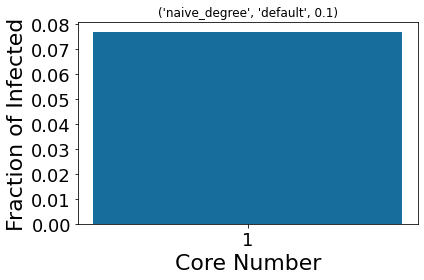

In [52]:
save = True

group_list = ['algo', 'dataset', 'p']
for key, item in df.groupby(group_list, as_index=False):
    # there should be only one result
    assert item.shape[0] == 1
    
    result = literal_eval(item['result'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'infected'])
    
    sns.barplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
    plt.xlabel('Core Number', fontsize=fontsize)
    plt.ylabel("Fraction of Infected", fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    plt.title(key)
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig(output_folder+"fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()